In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime, timedelta
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
dir_name = os.getenv('DIR_NAME')

# Load data from CSV file
repos_data = pd.read_csv(f'../../data/processed/{dir_name}/repos_data.csv', encoding='latin1')
users_data = pd.read_csv(f'../../data/processed/{dir_name}/users_data.csv', encoding='latin1')

In [4]:
# Check the first few rows of the data
print(repos_data.head())
print('---------------------------------------------')

# Check the number of rows and columns in the data
print(f"Number of rows: {repos_data.shape[0]}")
print(f"Number of columns: {repos_data.shape[1]}")
print('---------------------------------------------')

# Check for missing values in the data and remove them
print(repos_data.isnull().sum())

repos_data = repos_data.dropna()
print(f"New number of rows: {repos_data.shape[0]}")
print('---------------------------------------------')

# Check the data types of the columns
print(repos_data.dtypes)
print('---------------------------------------------')


          id  owner_id language  created_at  updated_at  stargazers_count  \
0  610791194    346687     Java  2023-03-07  2023-03-07                 0   
1  613695207    346687      NaN  2023-03-14  2023-03-14                 0   
2  250598823    404506     Java  2020-03-27  2020-08-27                 0   
3  251688437    404506    Shell  2020-03-31  2020-04-08                 0   
4   10096889    404506     Java  2013-05-16  2013-05-16                 0   

   forks_count  
0            0  
1            0  
2            0  
3            0  
4            0  
---------------------------------------------
Number of rows: 18491
Number of columns: 7
---------------------------------------------
id                     0
owner_id               0
language            6833
created_at             0
updated_at             0
stargazers_count       0
forks_count            0
dtype: int64
New number of rows: 11658
---------------------------------------------
id                   int64
owner_id     

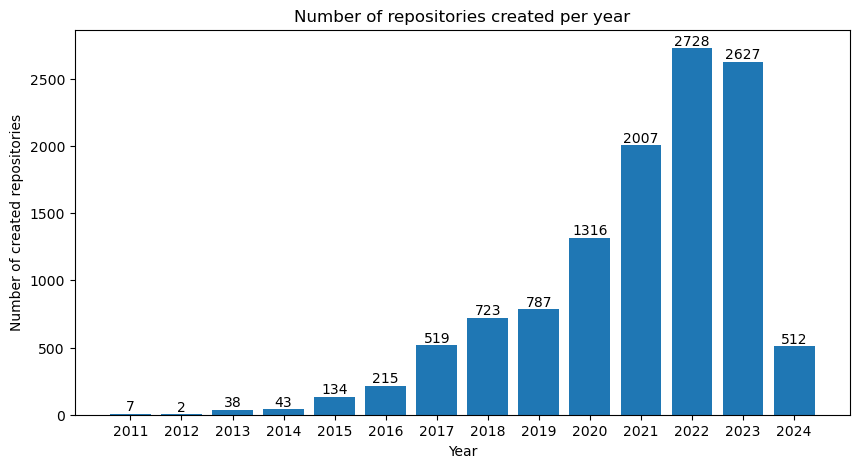

In [5]:
# Convert the "created_at" column to datetime type
repos_data['created_at'] = pd.to_datetime(repos_data['created_at'])

# Extract the years and their respective repository count
years = repos_data['created_at'].dt.year
sorted_years = Counter(years)
sorted_years = dict(sorted(sorted_years.items(), key=lambda x: x[0]))

# Display the years graph
years = [i for i, _ in sorted_years.items()]
entries = [i for _, i in sorted_years.items()]

title = 'Number of repositories created per year'

plt.figure(figsize=(10, 5))
plt.bar(range(len(years)), entries)
plt.xticks(range(len(years)), years)
plt.xlabel('Year')
plt.ylabel('Number of created repositories')
plt.title(title)

for i, v in enumerate(entries):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')

plt.savefig(f'../../data/results/{dir_name}/{title.lower().replace(" ", "_")}.png')

plt.show()


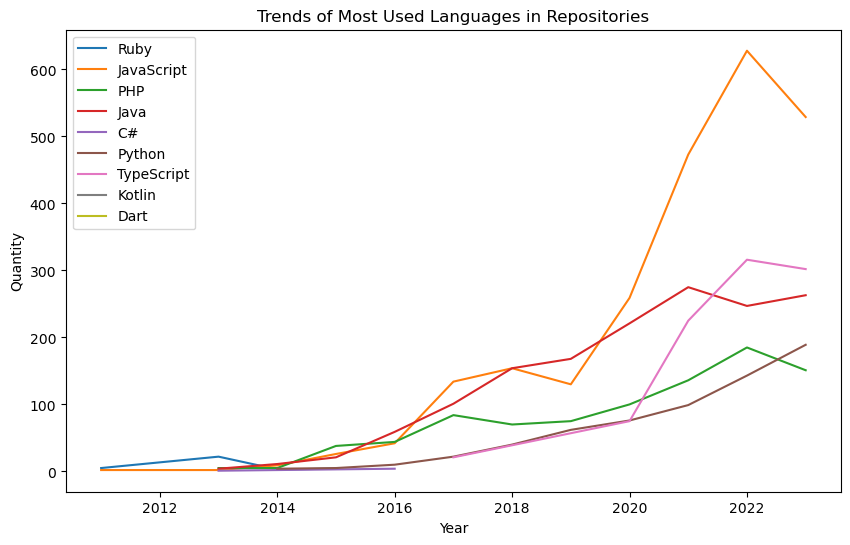

In [6]:
# Remove HTML and CSS so as not to interfere with programming languages
repos_data['years'] = repos_data['created_at'].dt.year
repos_data = repos_data[repos_data['years'] != 2024]
repos_data['language'] = repos_data['language'].drop(repos_data[repos_data['language'] == 'HTML'].index)
repos_data['language'] = repos_data['language'].drop(repos_data[repos_data['language'] == 'CSS'].index)


# Group data by year and count the occurrences of each language
grouped_data = repos_data.groupby(['years', 'language']).size().reset_index(name='count')

# Filter the top 5 most used languages for each year
top_languages = grouped_data.groupby('years').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

years = top_languages['years'].unique()
languages = top_languages['language'].unique()

# Configure colors for each language
colors = plt.cm.tab10.colors[:len(languages)]

# Plot trend chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, language in enumerate(languages):
    language_data = top_languages[top_languages['language'] == language]
    ax.plot(language_data['years'], language_data['count'], label=language, color=colors[i])

title = 'Trends of Most Used Languages in Repositories'
ax.set_title(title)
ax.set_xlabel('Year')
ax.set_ylabel('Quantity')
ax.legend()

plt.savefig(f'../../data/results/{dir_name}/{title.lower().replace(" ", "_")}.png')

plt.show()


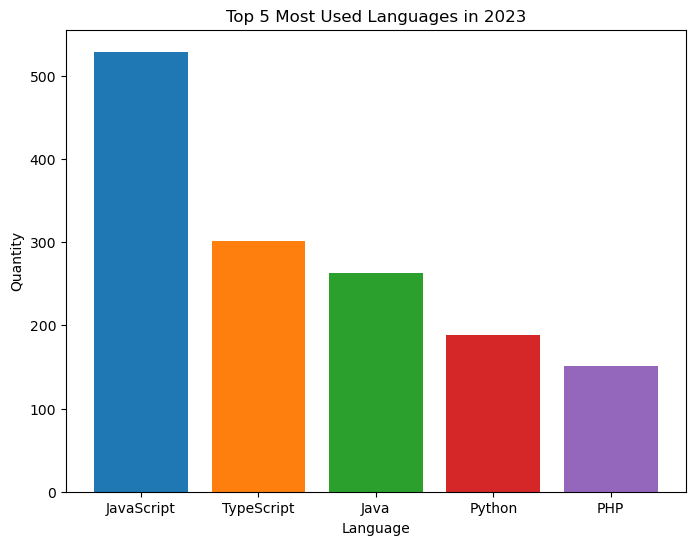

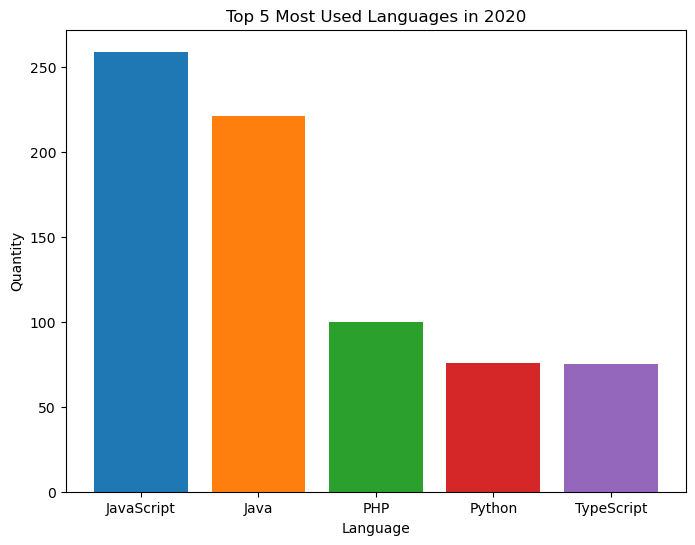

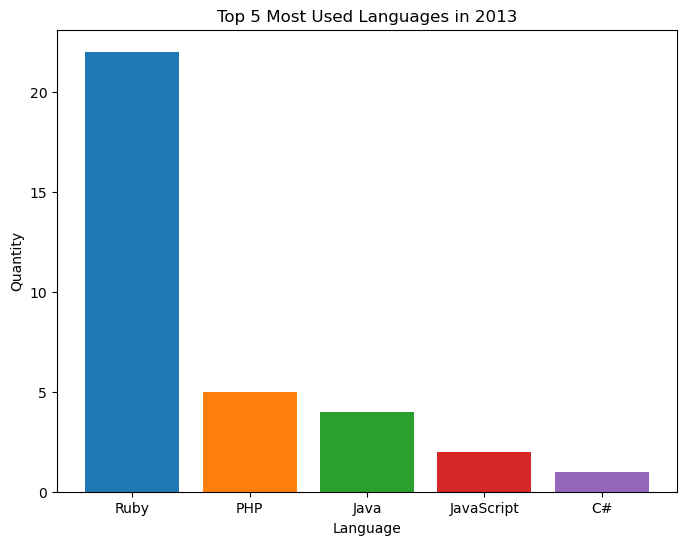

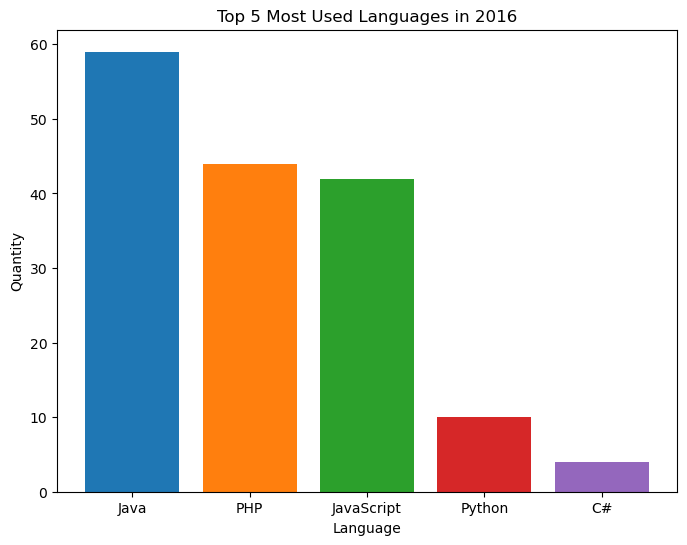

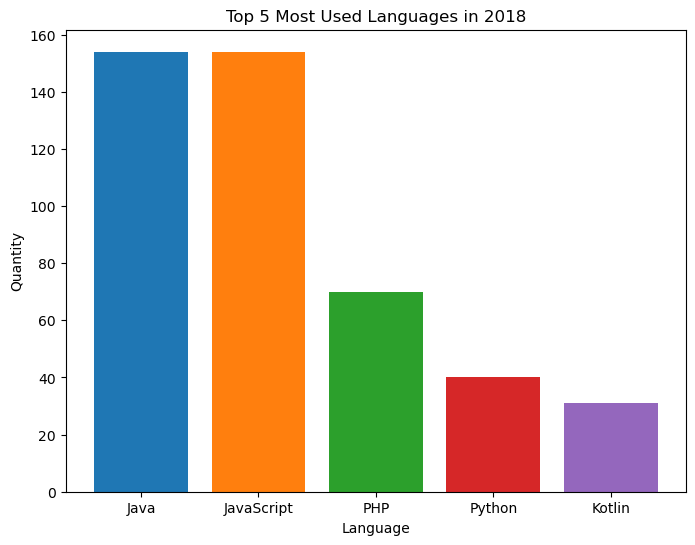

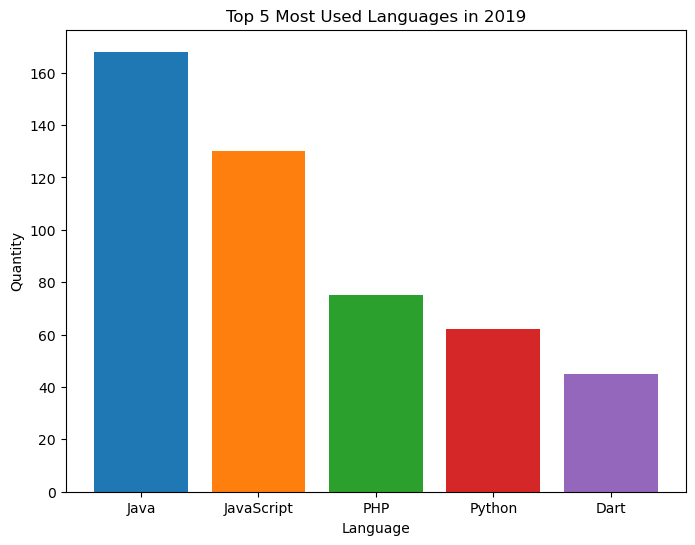

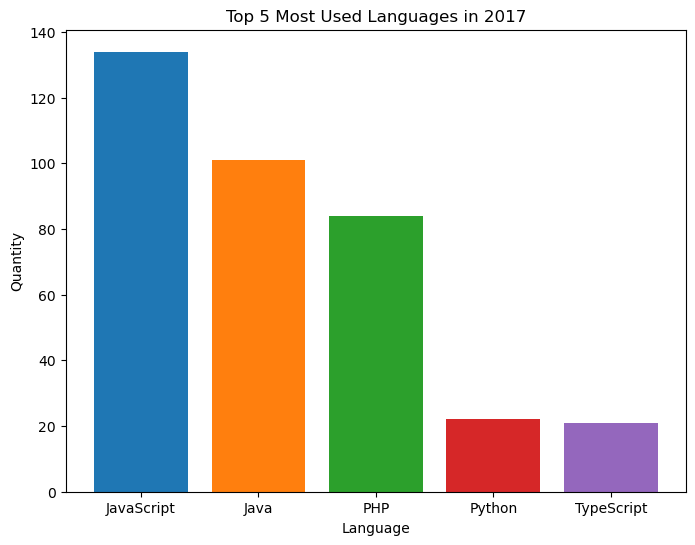

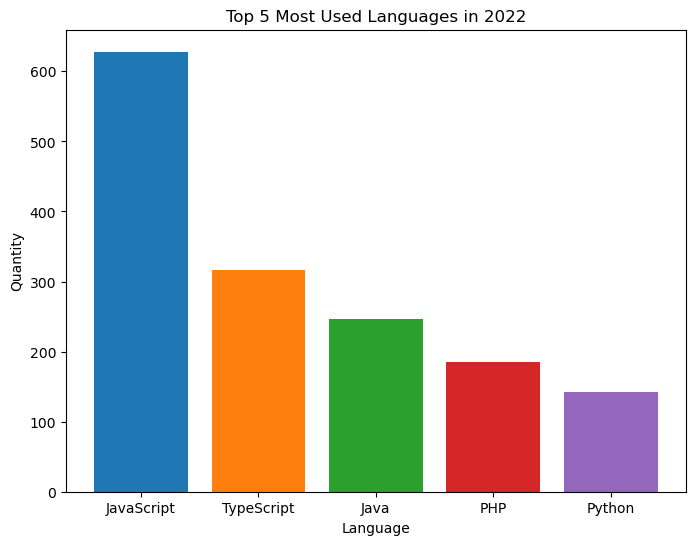

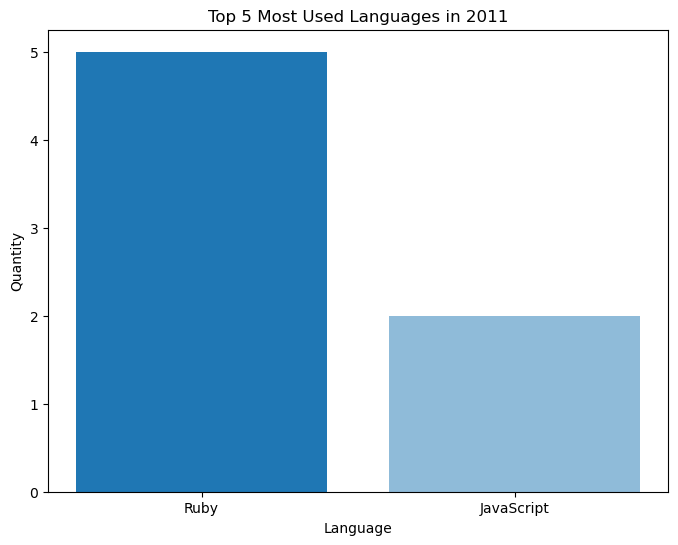

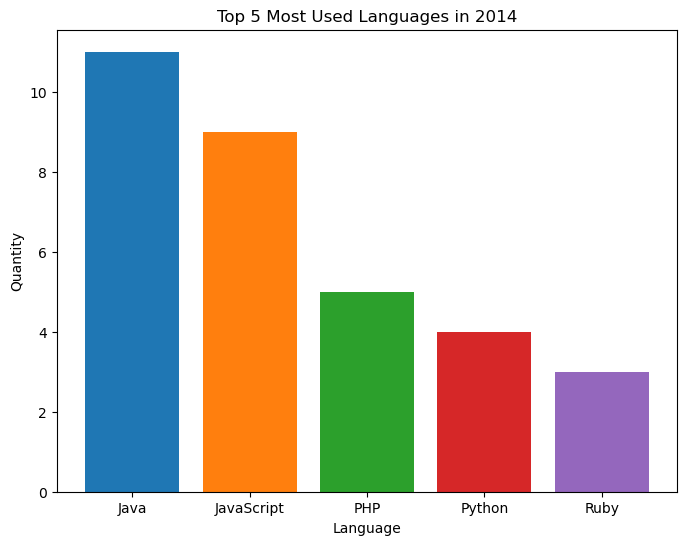

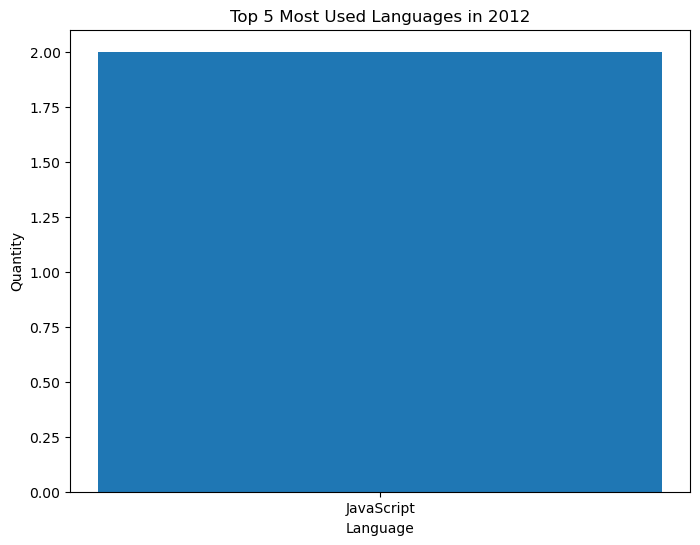

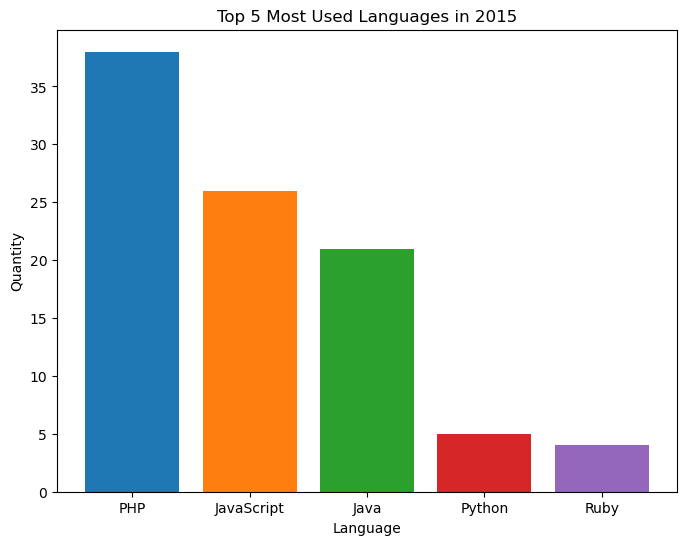

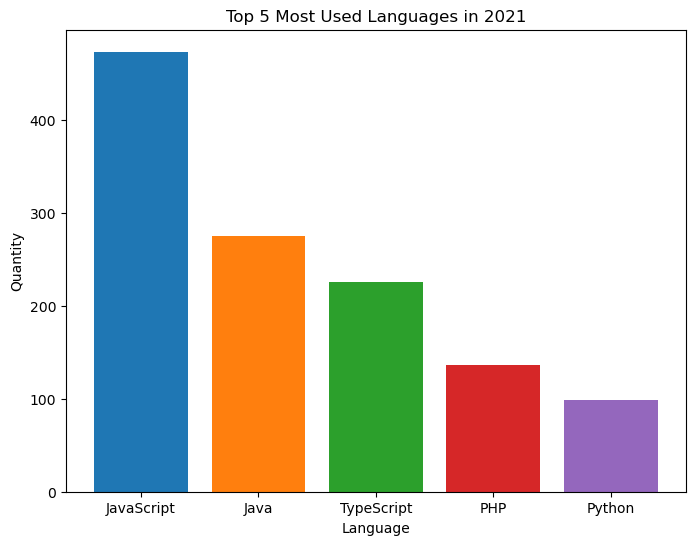

In [7]:
# Get list of years
years = repos_data['years'].unique()

# Create a bar chart for each year
for year in years:
    # Filter data for the current year
    year_data = grouped_data[grouped_data['years'] == year]
    
    # Sort languages by count
    year_data = year_data.sort_values('count', ascending=False).head(5)
    
    # Prepare data for the chart
    languages = year_data['language']
    counts = year_data['count']
    
    colors = plt.cm.tab10.colors[:len(languages)]
    
    plt.figure(figsize=(8, 6))
    plt.bar(languages, counts, color=colors)

    title = f'Top 5 Most Used Languages in {year}'
    plt.title(title)
    plt.xlabel('Language')
    plt.ylabel('Quantity')

    plt.savefig(f'../../data/results/{dir_name}/{title.lower().replace(" ", "_")}.png')
        
    plt.show()


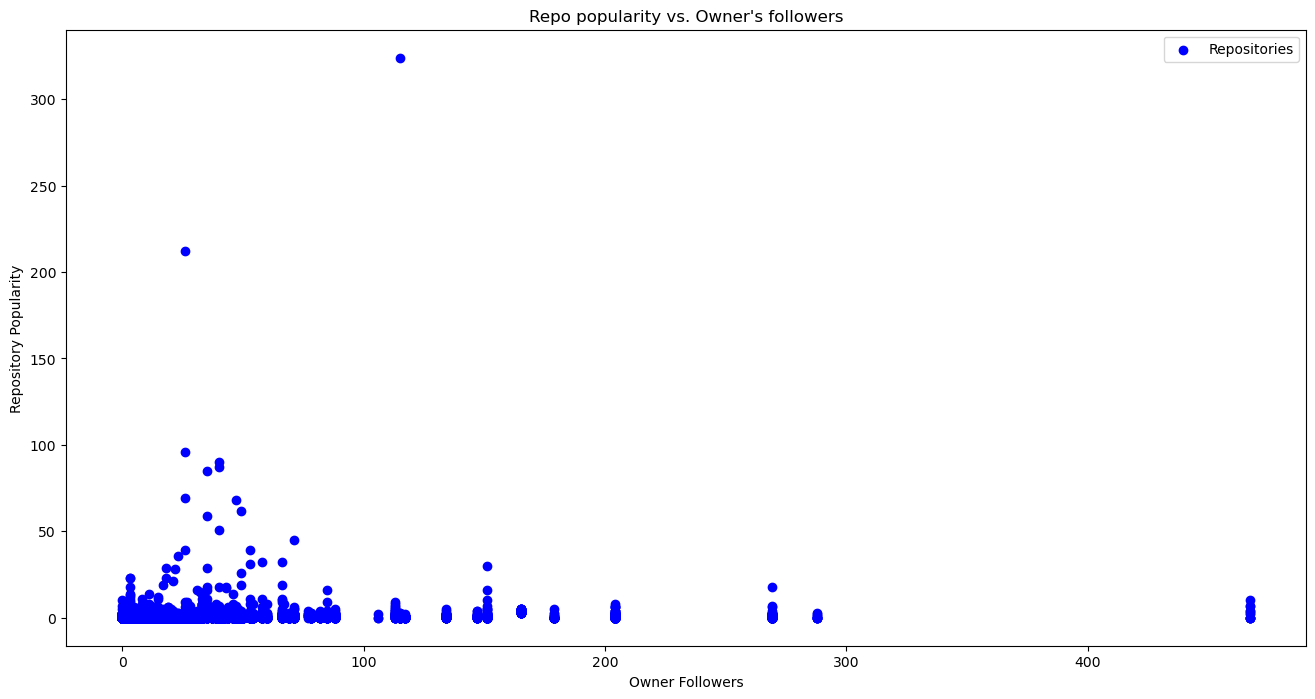

In [8]:
# Add necessary columns
repos_data['popularity'] = repos_data['stargazers_count'] + repos_data['forks_count']

united_data = repos_data.sort_values(by=['popularity'], ascending=False)

followers_dict = dict(zip(users_data['id'], users_data['followers']))

followers = [followers_dict[i] for i in united_data['owner_id']]
stars = united_data['popularity'].values.tolist()

users = united_data['owner_id'].values.tolist()
lang = united_data['language'].values.tolist()

plt.figure(figsize=(16, 8))

# Create scatter plot
title = "Repo popularity vs. Owner's followers"
plt.scatter(followers, stars, marker='o', c='blue', label='Repositories')
plt.xlabel('Owner Followers')
plt.ylabel('Repository Popularity')
plt.title(title)
plt.legend()

plt.savefig(f'../../data/results/{dir_name}/{title.lower().replace(" ", "_")}.png')

plt.show()


In [71]:
# repos_data = repos_data.groupby('owner_id').sum()

# # Add necessary columns
# repos_data['popularity'] = repos_data['stargazers_count'] + repos_data['forks_count']

# merged_data = repos_data.sort_values(by=['popularity'], ascending=False)

# merged_data['owner_id'] = merged_data.index.tolist()

# followers_dict = dict(zip(users_data['id'], users_data['followers']))

# followers = [followers_dict[i] for i in merged_data['owner_id']]
# stars = merged_data['popularity'].values.tolist()

# users = merged_data['owner_id'].values.tolist()

# plt.figure(figsize=(16, 8))

# # Create scatter plot
# title = "Repo Popularity vs. Ownership"
# plt.scatter(followers, stars, marker='o', c='blue', label='Users')
# plt.xlabel('Owner Popularity')
# plt.ylabel('Repository Popularity')
# plt.title(title)
# plt.legend()

# plt.savefig(f'../../data/results/01.24/{title.lower().replace(" ", "_")}.png')

# plt.show()


In [9]:
# Reload data from CSV file
repos_data = pd.read_csv(f'../../data/processed/{dir_name}/repos_data.csv', encoding='latin1')
repos_data = repos_data.dropna()

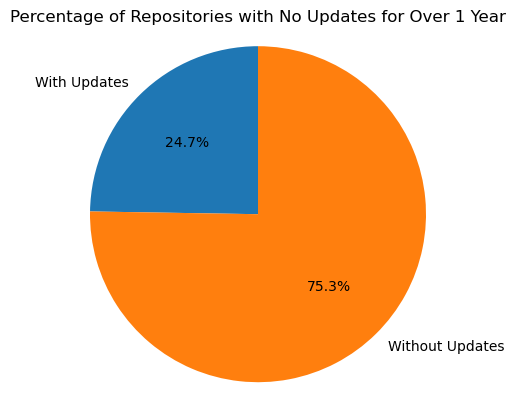

In [10]:
# Convert date columns to datetime type
repos_data['created_at'] = pd.to_datetime(repos_data['created_at'])
repos_data['updated_at'] = pd.to_datetime(repos_data['updated_at'])

# Filter repositories with at least 1 year of existence
current_date = datetime.now()
one_year_ago = current_date - timedelta(days=365)

# Calculate the percentage of repositories without updates
percentage_without_updates = (repos_data[repos_data['updated_at'] <= one_year_ago].shape[0] / repos_data.shape[0]) * 100

# Calculate the percentage of repositories with updates
percentage_with_updates = 100 - percentage_without_updates

# Create a pie chart
labels = ['With Updates', 'Without Updates']
values = [percentage_with_updates, percentage_without_updates]

title = 'Percentage of Repositories with No Updates for Over 1 Year'
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title(title)

plt.savefig(f'../../data/results/{dir_name}/{title.lower().replace(" ", "_")}.png')

plt.show()
